In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing import image

from collections import defaultdict

import time
import os
from PIL import Image
#Hash images using the ImageHash library
#https://pypi.python.org/pypi/ImageHash
import imagehash

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import os
import sys
module_path = os.path.abspath('src')
if module_path not in sys.path:
    sys.path.append(module_path)

In [50]:
from src.image_manager import ImageManager

In [94]:
from src.scrape_images import ImageScraper

In [2]:
time.time()

1517720559.493251

In [3]:
time.time()

1517720566.3615081

In [4]:
type(time.time())

float

In [5]:
lst = ['a', 'b', 'c']
lst[0:1]

['a']

In [56]:
!pwd

/Users/ndbs/tree-logic


In [60]:
!ls ~/tree-logic/tree_photos/picea_sitchensis

image_picea_sitchensis_0.png            image_sitka_spruce_68.png
image_picea_sitchensis_1.png            image_sitka_spruce_69.png
image_picea_sitchensis_16.png           image_sitka_spruce_7.png
image_picea_sitchensis_17.png           image_sitka_spruce_70.png
image_picea_sitchensis_19.png           image_sitka_spruce_71.png
image_picea_sitchensis_2.png            image_sitka_spruce_72.png
image_picea_sitchensis_20.png           image_sitka_spruce_73.png
image_picea_sitchensis_22.png           image_sitka_spruce_74.png
image_picea_sitchensis_24.png           image_sitka_spruce_75.png
image_picea_sitchensis_25.png           image_sitka_spruce_76.png
image_picea_sitchensis_26.png           image_sitka_spruce_77.png
image_picea_sitchensis_27.png           image_sitka_spruce_79.png
image_picea_sitchensis_3.png            image_sitka_spruce_8.png
image_picea_sitchensis_30.png           image_sitka_spruce_80.png
image_picea_sitchensis_31.png           image_sitka_spruce_85.png
image_picea_

## Prototype what I want ImageManager interface to look like, and test it!

In [63]:
manager = ImageManager('tree_photos')
directory_names = ['picea_sitchensis', 'bad_images']

In [64]:
#manager.take_inventory(directory_names) #
#or manager.take_inventory() #default is to walk through all subdirectories
manager.sync_images(directory_names) #Syncs the manager's dataframe and dictionary to the specified directories
#or manager.sync_images() #default is to sync all subdirectories

In [65]:
manager.get_duplicates() #get dictionary of image hashes mapping to more than one path

{array([[ True, False,  True, False,  True, False,  True,  True],
        [False, False, False, False,  True,  True,  True, False],
        [ True,  True, False,  True, False,  True,  True,  True],
        [False,  True,  True, False,  True,  True, False,  True],
        [ True,  True, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [False, False,  True, False,  True,  True, False,  True],
        [ True, False, False,  True, False, False,  True,  True]], dtype=bool): ['tree_photos/bad_images/image_acer_macrophylum_leaves_71.png',
  'tree_photos/bad_images/image_acer_macrophylum_90.png'],
 array([[ True,  True, False,  True, False, False,  True, False],
        [ True, False, False,  True,  True, False,  True,  True],
        [False,  True,  True, False,  True,  True, False,  True],
        [ True,  True, False, False, False,  True,  True, False],
        [ True, False, False,  True, False, False,  True, False],
     

In [66]:
manager.image_df.head()

,p_hash,filename,folder,time_added,time_verified
0,daf0881497fa12ed,image_sitka_spruce_forest_92.png,picea_sitchensis,2018-02-04 22:17:11.009109,2018-02-04 22:17:11.009109
1,f3b33d68046c2d4d,image_sitka_spruce_forest_86.png,picea_sitchensis,2018-02-04 22:17:11.031102,2018-02-04 22:17:11.031102
2,99a7465a1e99acb4,image_picea_sitchensis_27.png,picea_sitchensis,2018-02-04 22:17:11.049848,2018-02-04 22:17:11.049848
3,b4e9258745b48aeb,image_sitka_spruce_forest_51.png,picea_sitchensis,2018-02-04 22:17:11.060264,2018-02-04 22:17:11.060264
4,f8d0fde0fc906990,image_sitka_spruce_forest_45.png,picea_sitchensis,2018-02-04 22:17:11.068754,2018-02-04 22:17:11.068754


In [67]:
manager.remove_duplicates() #delete duplicate image files
manager.get_duplicates()

{}

In [76]:
manager.sync_images()

In [77]:
manager.syncs_df

,time_started,time_completed
0,2018-02-04 22:17:10.870517,2018-02-04 22:17:17.920112
1,2018-02-04 22:32:31.024992,2018-02-04 22:33:45.647715


In [78]:
manager.image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 3856
Data columns (total 5 columns):
p_hash           3857 non-null object
filename         3857 non-null object
folder           3857 non-null object
time_added       3857 non-null datetime64[ns]
time_verified    3857 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 180.8+ KB


In [80]:
manager.image_df.head()

,p_hash,filename,folder,time_added,time_verified
0,daf0881497fa12ed,image_sitka_spruce_forest_92.png,picea_sitchensis,2018-02-04 22:17:11.009109,2018-02-04 22:33:01.007864
1,f3b33d68046c2d4d,image_sitka_spruce_forest_86.png,picea_sitchensis,2018-02-04 22:17:11.031102,2018-02-04 22:33:01.027029
2,99a7465a1e99acb4,image_picea_sitchensis_27.png,picea_sitchensis,2018-02-04 22:17:11.049848,2018-02-04 22:33:01.046446
3,b4e9258745b48aeb,image_sitka_spruce_forest_51.png,picea_sitchensis,2018-02-04 22:17:11.060264,2018-02-04 22:33:01.067552
4,f8d0fde0fc906990,image_sitka_spruce_forest_45.png,picea_sitchensis,2018-02-04 22:17:11.068754,2018-02-04 22:33:01.089674


In [81]:
manager.image_df.tail()

,p_hash,filename,folder,time_added,time_verified
3852,f152a52ac3cf9ea0,image_alnus_rubra_62.png,alnus_rubra,2018-02-04 22:33:45.608505,2018-02-04 22:33:45.608505
3853,e92496995a3365cd,image_alnus_rubra_89.png,alnus_rubra,2018-02-04 22:33:45.617161,2018-02-04 22:33:45.617161
3854,d18371be1ae50e69,image_alnus_rubra_88.png,alnus_rubra,2018-02-04 22:33:45.627402,2018-02-04 22:33:45.627402
3855,d378a06997cca51b,image_alnus_rubra_63.png,alnus_rubra,2018-02-04 22:33:45.636108,2018-02-04 22:33:45.636108
3856,93963963399bca85,image_alnus_rubra_77.png,alnus_rubra,2018-02-04 22:33:45.644243,2018-02-04 22:33:45.644243


In [79]:
manager.get_duplicates() #Interesting, some photos are showing up for different species....

{array([[ True, False, False,  True, False, False, False,  True],
        [False, False,  True,  True, False, False, False,  True],
        [False, False,  True,  True,  True,  True, False,  True],
        [ True,  True, False, False, False,  True, False, False],
        [False,  True,  True,  True, False,  True,  True, False],
        [False,  True,  True, False, False,  True,  True,  True],
        [False,  True,  True, False, False,  True, False, False],
        [False, False,  True,  True,  True,  True,  True, False]], dtype=bool): ['tree_photos/picea_sitchensis/image_picea_sitchensis_needles_33.png',
  'tree_photos/pseudotsuga_menziesii/image_douglas_fir_needles_51.png'],
 array([[ True,  True, False,  True, False, False, False, False],
        [ True, False, False, False,  True,  True,  True, False],
        [ True, False, False, False,  True, False,  True,  True],
        [ True, False, False,  True, False,  True,  True, False],
        [False,  True,  True,  True,  True, False,

In [90]:
len(manager.get_duplicates())

7

In [151]:
paths = np.array(list(manager.get_duplicates().values())).flatten()
gen = manager.generate_images_from_paths(paths)
print(paths)

['tree_photos/picea_sitchensis/image_picea_sitchensis_needles_33.png'
 'tree_photos/pseudotsuga_menziesii/image_douglas_fir_needles_51.png'
 'tree_photos/picea_sitchensis/image_sitka_spruce_branches_41.png'
 'tree_photos/pseudotsuga_menziesii/image_douglas_fir_needles_52.png'
 'tree_photos/bad_images/image_big_leaf_maple_bark_61.png'
 'tree_photos/betula_papyrifera/image_betula_papyrifera_120.png'
 'tree_photos/bad_images/image_london plane_40.png'
 'tree_photos/platanus_acerifolia/image_london_plane_flowers_64.png'
 'tree_photos/bad_images/image_london plane_22.png'
 'tree_photos/platanus_acerifolia/image_london_plane_flowers_5.png'
 'tree_photos/bad_images/image_acer_macrophylum_seeds_98.png'
 'tree_photos/acer_macrophylum/image_acer_macrophylum_leaves_61.png'
 'tree_photos/tilia_cordata/image_little_leaf_linden_81.png'
 'tree_photos/acer_macrophylum/image_big_leaf_maple_bark_90.png']


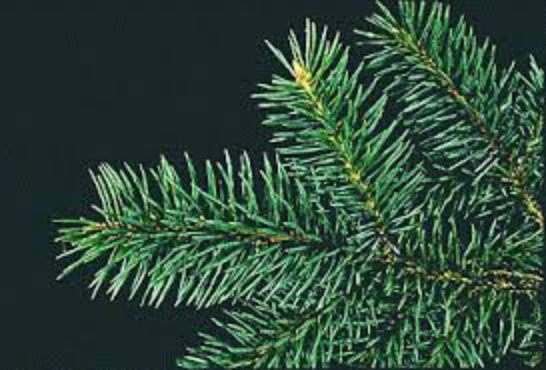

In [152]:
next(gen)

In [137]:
manager.image_df.to_csv('data/image_log_20180204.csv', sep='|')

In [88]:
manager.syncs_df.to_csv('data/image_syncs_20180204.csv', sep='|')

In [89]:
!ls -l data #So the csv file is about 488KB

total 82552
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    488281 Feb  4 22:49 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff       141 Feb  4 22:51 image_syncs_20180204.csv
-rw-r--r--  1 ndbs  staff     74715 Jan 30 12:03 tree_image_info.csv
-rw-r--r--  1 ndbs  staff  37792669 Jan 30 11:46 tree_images.csv


## Load a dataframe to figure out how to select certain things

In [8]:
image_df = pd.read_csv('data/tree_image_info.csv', sep='|', index_col=0)
image_df.head()

,p_hash,filename,species,tags
0,99a7465a1e99acb4,image_picea_sitchensis_27.png,picea_sitchensis,NaN
1,93d12f8e712ef068,image_picea_sitchensis_33.png,picea_sitchensis,NaN
2,cce3482eb991533b,image_picea_sitchensis_6.png,picea_sitchensis,NaN
3,c119991c4fcf1cda,image_picea_sitchensis_in_winter_12.png,picea_sitchensis,NaN
4,e3c3dab100fdc29c,image_sitka_spruce_59.png,picea_sitchensis,NaN


In [9]:
image_df['species'].unique()

array(['picea_sitchensis', 'platanus_acerifolia', 'acer_macrophylum'], dtype=object)

In [11]:
platanus_slice_df = image_df.loc[image_df['species'] == 'platanus_acerifolia']
platanus_slice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 309 to 643
Data columns (total 4 columns):
p_hash      335 non-null object
filename    335 non-null object
species     335 non-null object
tags        0 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.1+ KB


In [12]:
pd.Timestamp.now()

Timestamp('2018-02-04 20:41:50.969472')

In [13]:
platanus_slice_df['timestamp'] = pd.Timestamp.now()

/Users/ndbs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
platanus_slice_df.head()

,p_hash,filename,species,tags,timestamp
309,b95f8bc2719411d9,image_london_plane_36.png,platanus_acerifolia,NaN,2018-02-04 20:42:37.365247
310,e1e61e94e95a84e9,image_platanus_acerifolia_32.png,platanus_acerifolia,NaN,2018-02-04 20:42:37.365247
311,b0b1c75f4e8f4c30,image_platanus_acerifolia_6.png,platanus_acerifolia,NaN,2018-02-04 20:42:37.365247
312,cc9639a1fb5407e8,image_platanus_acerifolia_26.png,platanus_acerifolia,NaN,2018-02-04 20:42:37.365247
313,aa47f62eacd85286,image_platanus_acerifolia_in_winter_32.png,platanus_acerifolia,NaN,2018-02-04 20:42:37.365247


In [17]:
image_df.loc[309:330]

,p_hash,filename,species,tags
309,b95f8bc2719411d9,image_london_plane_36.png,platanus_acerifolia,NaN
310,e1e61e94e95a84e9,image_platanus_acerifolia_32.png,platanus_acerifolia,NaN
311,b0b1c75f4e8f4c30,image_platanus_acerifolia_6.png,platanus_acerifolia,NaN
312,cc9639a1fb5407e8,image_platanus_acerifolia_26.png,platanus_acerifolia,NaN
313,aa47f62eacd85286,image_platanus_acerifolia_in_winter_32.png,platanus_acerifolia,NaN
314,b28851b35da5ce1e,image_platanus_acerifolia_in_winter_26.png,platanus_acerifolia,NaN
315,c39736f60cc85d23,image_platanus_acerifolia_fruit_44.png,platanus_acerifolia,NaN
316,f82b82f007cdf654,image_platanus_acerifolia_fruit_50.png,platanus_acerifolia,NaN
317,e6ad99019dc219de,image_platanus_acerifolia_fruit_1.png,platanus_acerifolia,NaN
318,fe5a85b11c273166,image_platanus_acerifolia_fruit_78.png,platanus_acerifolia,NaN


In [18]:
timestamp1 = pd.Timestamp.now()
timestamp1

Timestamp('2018-02-04 20:45:53.454133')

In [19]:
timestamp2 = pd.Timestamp.now()

In [20]:
timestamp1 < timestamp2

True

In [21]:
timestamp1 > timestamp2

False

In [22]:
timestamp1 - timestamp2

Timedelta('-1 days +23:59:45.105714')

In [23]:
timestamp2 - timestamp1

Timedelta('0 days 00:00:14.894286')

In [25]:
platanus_slice_df[platanus_slice_df['timestamp']>timestamp1]

,p_hash,filename,species,tags,timestamp


In [26]:
image_dict = {h: [filename, species] for h, filename, species
              in zip(image_df['p_hash'], image_df['filename'], image_df['species'])
              if species in ['picea_sitchensis', 'platanus_acerifolia']}

In [29]:
len(image_dict)

644

In [36]:
image_df.loc[image_df['species'].isin(['platanus_acerifolia', 'acer_macrophylum']), 'p_hash'].describe()

count                  705
unique                 705
top       85efeac7c6413344
freq                     1
Name: p_hash, dtype: object

In [42]:
both = set(image_dict.keys()).intersection(image_df.loc[image_df['species'].isin(['platanus_acerifolia', 'acer_macrophylum']), 'p_hash'])

In [43]:
len(both)

335

In [45]:
image_df.loc[image_df['p_hash'].isin(both), 'species'].unique() #Woo hoo, this is the expected answer

array(['platanus_acerifolia'], dtype=object)

## Let's try out the ImageScraper class...

In [105]:
scraper = ImageScraper(manager)

In [97]:
search_terms_for_directories = {
        'betula_pendula': ['betula pendula']
    #     ,'acer_macrophylum': ['bigleaf maple forest', 'acer macrophylum tree', 'bigleaf maple branches']
    #     ,'platanus_acerifolia': ['london plane tree', 'london plane flowers']
    #     ,'pseudotsuga_menziesii': ['pseudotsuga menziesii tree', 'douglas fir needles']
    }

In [106]:
scraper.search_and_scrape(search_terms_for_directories)
#This managed to get 760 photos with a pause in the middle where I had to click "show more images"